In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [105]:
train   =   pd.read_csv('train.csv')
test    =   pd.read_csv('test.csv')
members =   pd.read_csv('members.csv')
songs   =   pd.read_csv('songs.csv')

In [106]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [107]:

test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [108]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [109]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [110]:
train = train.sample(frac=0.01)
train = pd.merge(train, songs, on='song_id', how='left')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,MDS7sDCCBtlbA2d/OhZ4w1AFXWU8UOQiiDoGaBRi8cQ=,uWREia5CNSoapbU9+BpqQxlSfntw1J/01HQGpVxFiM4=,discover,Online playlist more,online-playlist,0.0,283898.0,NaN,曾沛慈 (Pets Tseng),鴉片丹,黃婷,3.0
1,Wy+kogGme9xGE0wskc5DwFA3yS7kC0bZokvG4q2Xk7M=,qqSwRkEEupyglXAJQfkXOQR9feE0CcI3IEmY4MB/QQE=,NaN,My library,local-playlist,1.0,278674.0,458,蔡依林 (Jolin Tsai),Wei-Si-Li,Wei-Si-Li| Ru-Hong Hu,3.0
2,IgZ/XADfw5D7oOsCihSZ+GynIuuFVousZdXZRDYABz0=,BNExuJCD7PkhYzN+J3SfeBce2EO3wu0ODmHh4UKlUaw=,discover,Online playlist more,online-playlist,0.0,294138.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0
3,ebaNE2SlQnw1Lw0OBGN76VYJYXFelTxAs/M88oBNWg8=,DUF3jiukacWNOOendoQ1CB3QabU/4fC9B0zbAGt0kpc=,discover,Online playlist more,online-playlist,1.0,185051.0,465,謝金燕 (Jeannie Hsieh),謝金燕,謝金燕,3.0
4,wlFjuBSYftzA+svI+bo1jnHQvVF4iU9W44EG9TeBdZc=,DcK95I6vp6jE3Jx0M45ygyauM1VNQw6lCLlewoM1eq0=,search,Artist more,top-hits-for-artist,0.0,222902.0,465,TWO DOOR CINEMA CLUB,NaN,NaN,52.0


In [111]:
train = pd.merge(train, members, on='msno', how='left')
train.shape

(9720, 18)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 0 to 9719
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    9720 non-null   object 
 1   song_id                 9720 non-null   object 
 2   source_system_tab       9686 non-null   object 
 3   source_screen_name      9293 non-null   object 
 4   source_type             9690 non-null   object 
 5   target                  9720 non-null   float64
 6   song_length             8488 non-null   float64
 7   genre_ids               8365 non-null   object 
 8   artist_name             8488 non-null   object 
 9   composer                6746 non-null   object 
 10  lyricist                5042 non-null   object 
 11  language                8488 non-null   float64
 12  city                    9720 non-null   int64  
 13  bd                      9720 non-null   int64  
 14  gender                  5830 non-null   

In [113]:
np.mean(train.target)

0.6905349794238683

In [114]:
null_check = train.isnull()
print((null_check.sum()/null_check.count())*100)

msno                       0.000000
song_id                    0.000000
source_system_tab          0.349794
source_screen_name         4.393004
source_type                0.308642
target                     0.000000
song_length               12.674897
genre_ids                 13.940329
artist_name               12.674897
composer                  30.596708
lyricist                  48.127572
language                  12.674897
city                       0.000000
bd                         0.000000
gender                    40.020576
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [115]:
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
    
train = train.fillna(value=0)
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,MDS7sDCCBtlbA2d/OhZ4w1AFXWU8UOQiiDoGaBRi8cQ=,uWREia5CNSoapbU9+BpqQxlSfntw1J/01HQGpVxFiM4=,discover,Online playlist more,online-playlist,0.0,283898.0,unknown,曾沛慈 (Pets Tseng),鴉片丹,黃婷,3.0,1,0,unknown,7,20160917,20171007
1,Wy+kogGme9xGE0wskc5DwFA3yS7kC0bZokvG4q2Xk7M=,qqSwRkEEupyglXAJQfkXOQR9feE0CcI3IEmY4MB/QQE=,unknown,My library,local-playlist,1.0,278674.0,458,蔡依林 (Jolin Tsai),Wei-Si-Li,Wei-Si-Li| Ru-Hong Hu,3.0,15,23,female,3,20141223,20170910
2,IgZ/XADfw5D7oOsCihSZ+GynIuuFVousZdXZRDYABz0=,BNExuJCD7PkhYzN+J3SfeBce2EO3wu0ODmHh4UKlUaw=,discover,Online playlist more,online-playlist,0.0,294138.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0,22,27,female,9,20110816,20171005
3,ebaNE2SlQnw1Lw0OBGN76VYJYXFelTxAs/M88oBNWg8=,DUF3jiukacWNOOendoQ1CB3QabU/4fC9B0zbAGt0kpc=,discover,Online playlist more,online-playlist,1.0,185051.0,465,謝金燕 (Jeannie Hsieh),謝金燕,謝金燕,3.0,13,18,male,9,20150611,20170919
4,wlFjuBSYftzA+svI+bo1jnHQvVF4iU9W44EG9TeBdZc=,DcK95I6vp6jE3Jx0M45ygyauM1VNQw6lCLlewoM1eq0=,search,Artist more,top-hits-for-artist,0.0,222902.0,465,TWO DOOR CINEMA CLUB,unknown,unknown,52.0,1,25,male,3,20130415,20180128


In [116]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
for i in train.select_dtypes(include=['category']).columns:
    train[i] = train[i].cat.codes
from sklearn.model_selection import train_test_split
X_train = train.drop(['target'], axis = 1).values
y_train = train['target'].values
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 329  587]
 [ 212 1788]]


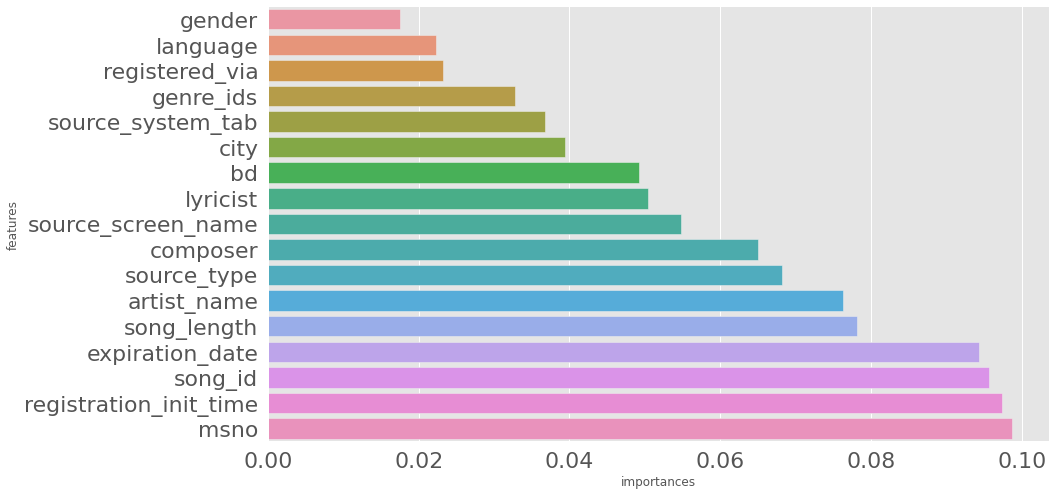

In [118]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()

In [119]:
ntr = 7000
nts = 3000
data_path = r"train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"songs.csv")
members = pd.read_csv(r"members.csv")

In [120]:

train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [121]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
4836,ZIThPCdbFdxx0T+qKaAnQprzkTcoMTJL66Of3nlFGLA=,rMY+Fcdnz76AnsO6Dqq8nkIbmUs5AooQu1+PQm0rt+E=,discover,Discover Feature,song-based-playlist,1
3383,lUw6VAkG8CzVPdmIY4+JiMNp911Oon6TUxsXlgbwMzg=,n/hbKyBhjxpJo5v5SZCZX4BvH80XcxVmHZ1CEx4HhuI=,radio,Radio,radio,1
1127,13pIG+FIw8Fb00WnR6hCuVdqhnCbEDOvbmXOMI/J+XM=,fUGs+CNuo9R1M6NQbuyGVFMJmTf0TSFHjYDrBglyuVI=,my library,Local playlist more,local-library,1
1549,vMYLSwtRo481UdTJxx/IgSuaLRVj6mxowYobAuIdMA0=,ilchk9EyBKWMKqFY3U01I2xGYrdj9FtXSoLLpJcIQ4g=,my library,Local playlist more,local-library,0
6110,qLJqvaa5xP6APWYz3sDmI4KUIgqEwaDj9dt7fIeKsiU=,1H7Za3rqrfGZhzWonEKkW3BR1LfJaWlErO8nNZaldZM=,my library,Local playlist more,local-library,0
2970,tjZ6KzXUbpnCPuYWxw9cx/PrVh4/T+0PLRzINXfR1YU=,TRe3/tOgqw/x4a8nhG/qe88tQQXd2P7yem3Ub61D0CQ=,discover,Online playlist more,online-playlist,1
1042,EcgeFIEdmN7YHubZ/LW0pULEb4eU0vVoBSFvejaulJc=,pH1aUUtODp90JxquTFTQ1NQh91UXUtpO4F5iba9B31w=,my library,Local playlist more,local-playlist,1
456,Uwq4w90xJTWBJk0+3VGcccFsr1htGRCgZZ1LhlJ3JYU=,x0iMw0xgq1tn0Der7mqk2JVTsmDU9GoNphVKmMVx4MA=,my library,Local playlist more,local-playlist,1
1923,JEQcB78RQHk+8GGNdl5AH8teTbNSjCXDHjKJyYCGIe0=,aktDD8yTF/ayuipbojgs9qAR6kt4U/5rUbMz509wzeg=,my library,Local playlist more,local-playlist,1
2622,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,YhAOYjrvN+XdvOe/rMBXcaWfA8lqrJI/eIE6SyyYvlQ=,my library,Local playlist more,local-library,1


In [122]:
train.shape

(7000, 6)

In [123]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [124]:
train.describe()


,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [126]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

In [127]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220.0,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793.0,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623.0,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629.0,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [128]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
654641,EzWWwzP7Ulh9Db4QSvBawPw5L14QcYvnkvqu8CHW0QA=,209722.0,359,Imagine Dragons,Imagine Dragons,NaN,52.0
195149,GCbbv9uThzYmZebpGYDVqRnODN52hmw4IqaPF6Nfujk=,85995.0,465,Katt Williams,NaN,NaN,52.0
1344577,k90EoTjULnlxiR6urtHrF7NWn4M6fmdWNzAxYNOehq8=,282540.0,1609,The Beach House Marbella,NaN,NaN,-1.0
271349,701/ftoSQ9WblAEQ9rohlCeuEILGmf5D5ZyfwJSrt9E=,252133.0,458,Various Artists,胡力,胡力,3.0
390763,eLeVrWAU+7cb2NFVOLPdQPNHKa7+GB1hNYKVnR1h5nA=,283480.0,465,Various Artists,NaN,NaN,24.0
1113979,Y0lSls6Ngnhd/fcKeImg5j9Cm/2F5JhYs7iFi2i/oOM=,281240.0,1955,Grind Zero,Grind Zero,NaN,52.0
1223911,Sm3rTOBARA+VubYNQ7Lxyss4LsiiB8xUhb3WBaHLj5g=,370964.0,2122,Patrice Rushen,NaN,NaN,-1.0
833287,JtJ8U06c7MTPNTzSxHiJa/lUCYnbhym08HbqddwVgd8=,194490.0,NaN,Richard Clayderman,NaN,NaN,-1.0
613449,e/bLk7xGC5Iy1ZkE8lYqf+B4GmFci810YyFxIFJB+aQ=,198112.0,1259,Dumbfoundead,NaN,NaN,52.0
1106005,cYZtPXTVn1Axit0T9ddPeIFHK7l2P7xc2Fdz4hkQWsM=,242787.0,958,Charles Gerhardt,NaN,NaN,-1.0


In [129]:
songs.shape

(1351620, 7)

In [130]:
songs.describe()

,song_length,language
count,1.351619e+06,1.351618e+06
mean,2.473701e+05,3.167090e+01
std,1.573208e+05,2.424487e+01
min,1.850000e+02,-1.000000e+00
25%,1.865140e+05,-1.000000e+00
50%,2.280330e+05,5.200000e+01
75%,2.766880e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [131]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [132]:

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351620 entries, 0 to 1351619
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1351620 non-null  object 
 1   song_length  1351619 non-null  float64
 2   genre_ids    1300757 non-null  object 
 3   artist_name  1351619 non-null  object 
 4   composer     729625 non-null   object 
 5   lyricist     227927 non-null   object 
 6   language     1351618 non-null  float64
dtypes: float64(2), object(5)
memory usage: 72.2+ MB


In [133]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [134]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
31482,uFGyPbi+ZFg3qv9FMBgU/Hv0Aeogvrstmt1VT1Rc7Ag=,4,28,male,9,20130418,20170920
4064,8YvUbfZuAnLqrFzj/F3KB9lU41JC8mI6Ss02XOYyiCk=,1,0,NaN,3,20140330,20171002
2799,efGGE3UBw6zkvCRJS2vIosOyacmwRfCU4bLLCBURn0Y=,1,0,NaN,4,20160621,20170928
8765,R831LiRxp1lrYuvN+PnSodYjjxpKF+qHZ6EGbuYt0qU=,1,0,NaN,4,20160125,20160128
20413,oE58xBTAUaV2nwDtHzfcFxqsrXlTQeykSpl8PjIuIt0=,13,49,male,9,20040402,20170222
5246,VyQjJzdivMuHTgiUL6eR/meZkavpIAJwXO30l1zzg18=,1,0,NaN,7,20151213,20170913
6695,mftMvVkLBTyIyo68mb8/3YaEop6GxQHOsYnh0w7xoSU=,1,0,NaN,4,20160805,20170808
1929,rD6LOwLQtfV3dARiU8kfjm3OIuvdqBP45HNCSlqjJrk=,1,0,NaN,7,20140524,20170930
9280,NwsX1C4oYB8e/QTwbCvq3N9W4C9JP+mfOXdIGWCkXhI=,1,0,NaN,7,20131114,20161218
25122,LHfqNO1iiHWYtPQPI/S4yOr30P/fINITvhuo5EmBibc=,10,27,male,7,20140507,20170919


In [135]:
members.shape

(34403, 7)

In [136]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [137]:

members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [138]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [139]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

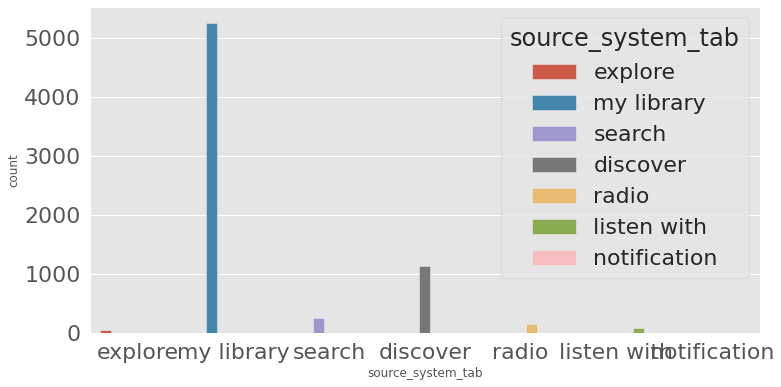

In [140]:
#DATA VISUALIZATION
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

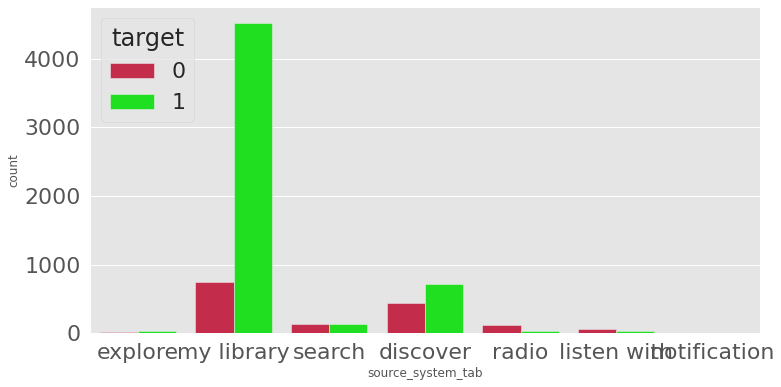

In [141]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

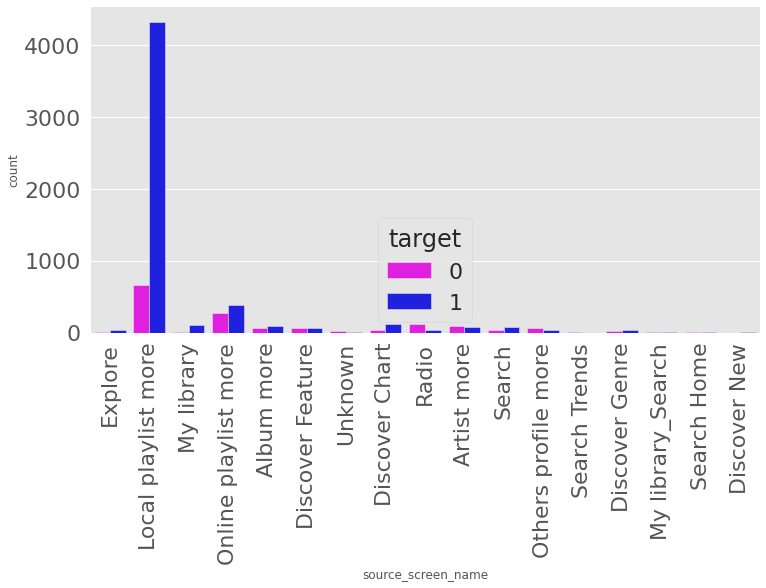

In [142]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

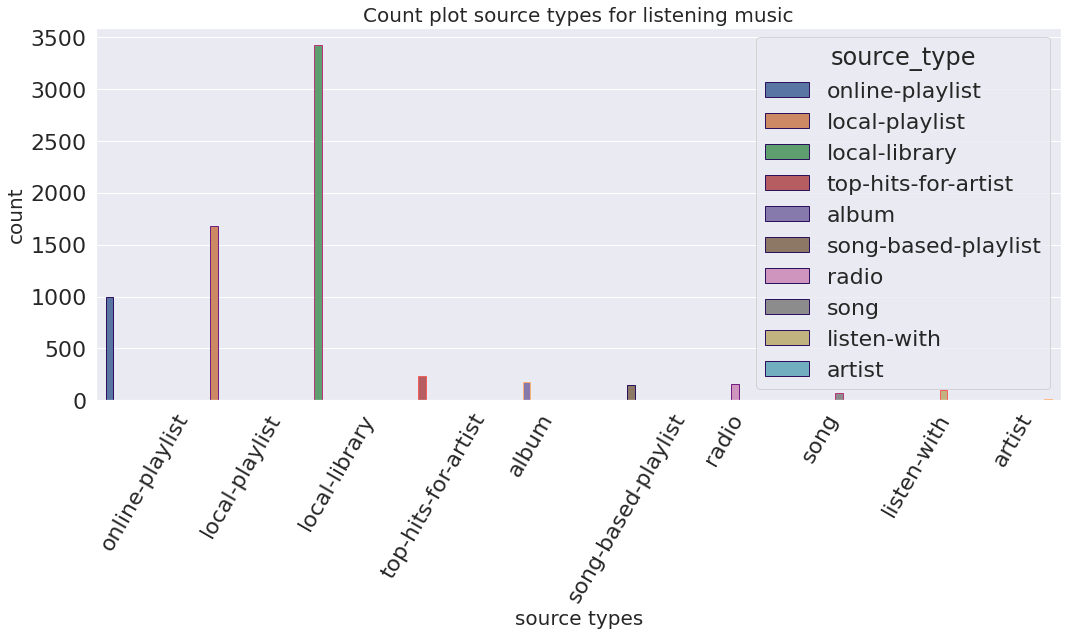

In [143]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='60')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

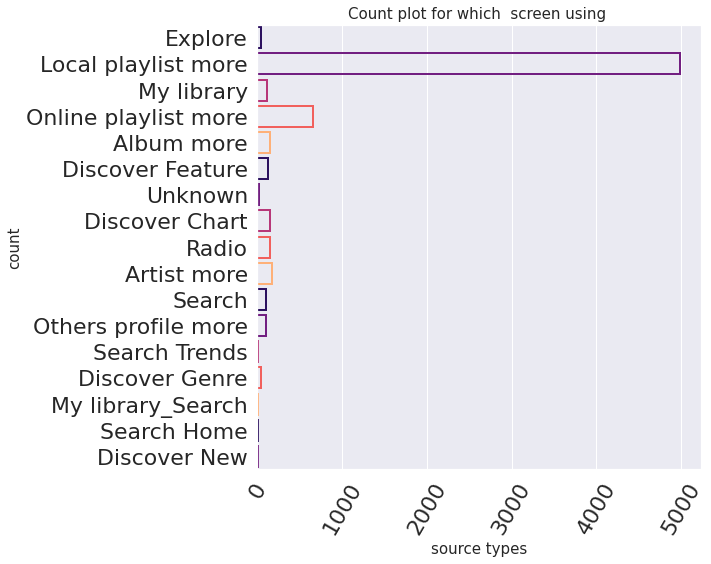

In [144]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='60')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [145]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [146]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

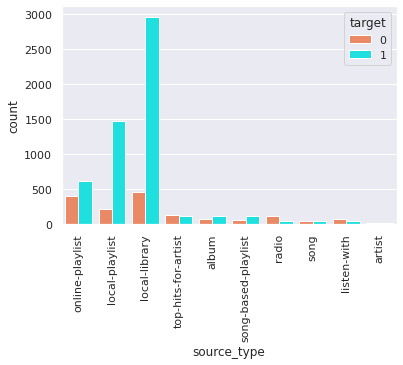

In [147]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

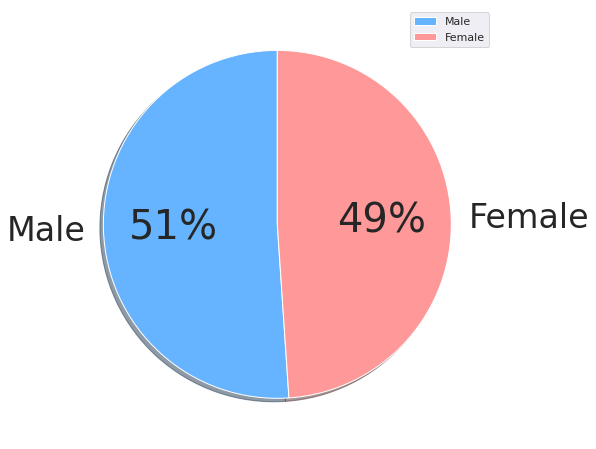

In [148]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

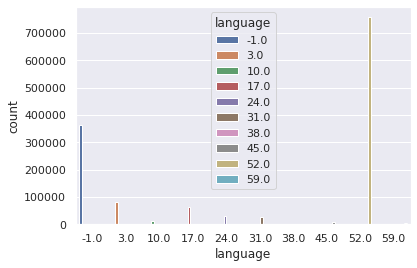

In [149]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')


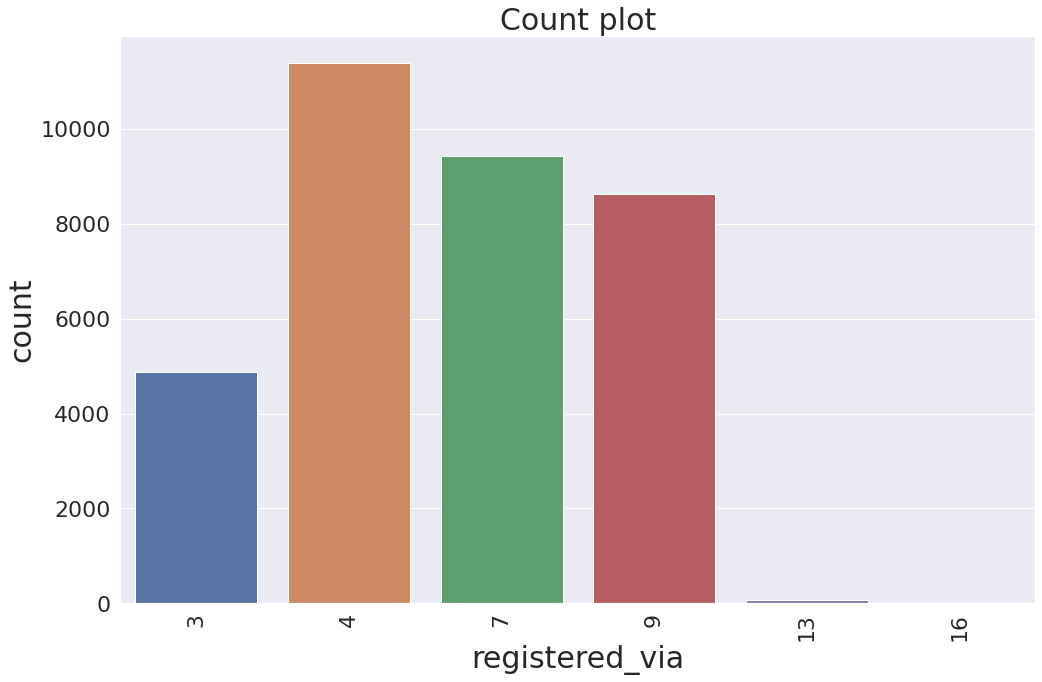

In [150]:
count_plot_function(members, 'registered_via')

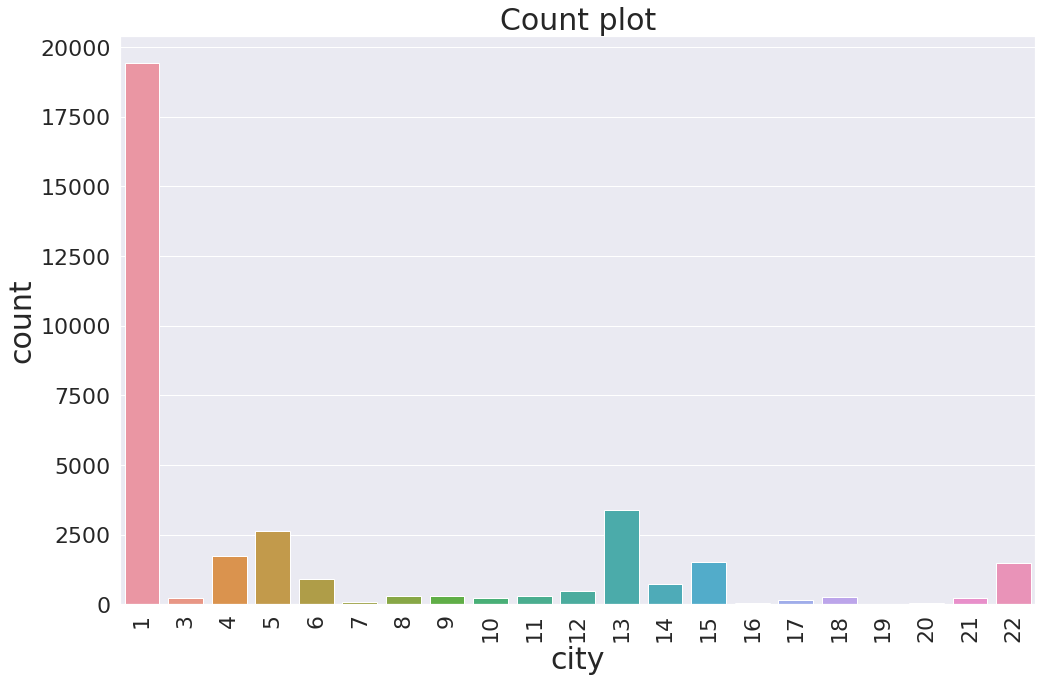

In [151]:
count_plot_function(members, 'city')

Text(0.5, 1.0, 'PDF for Registration')

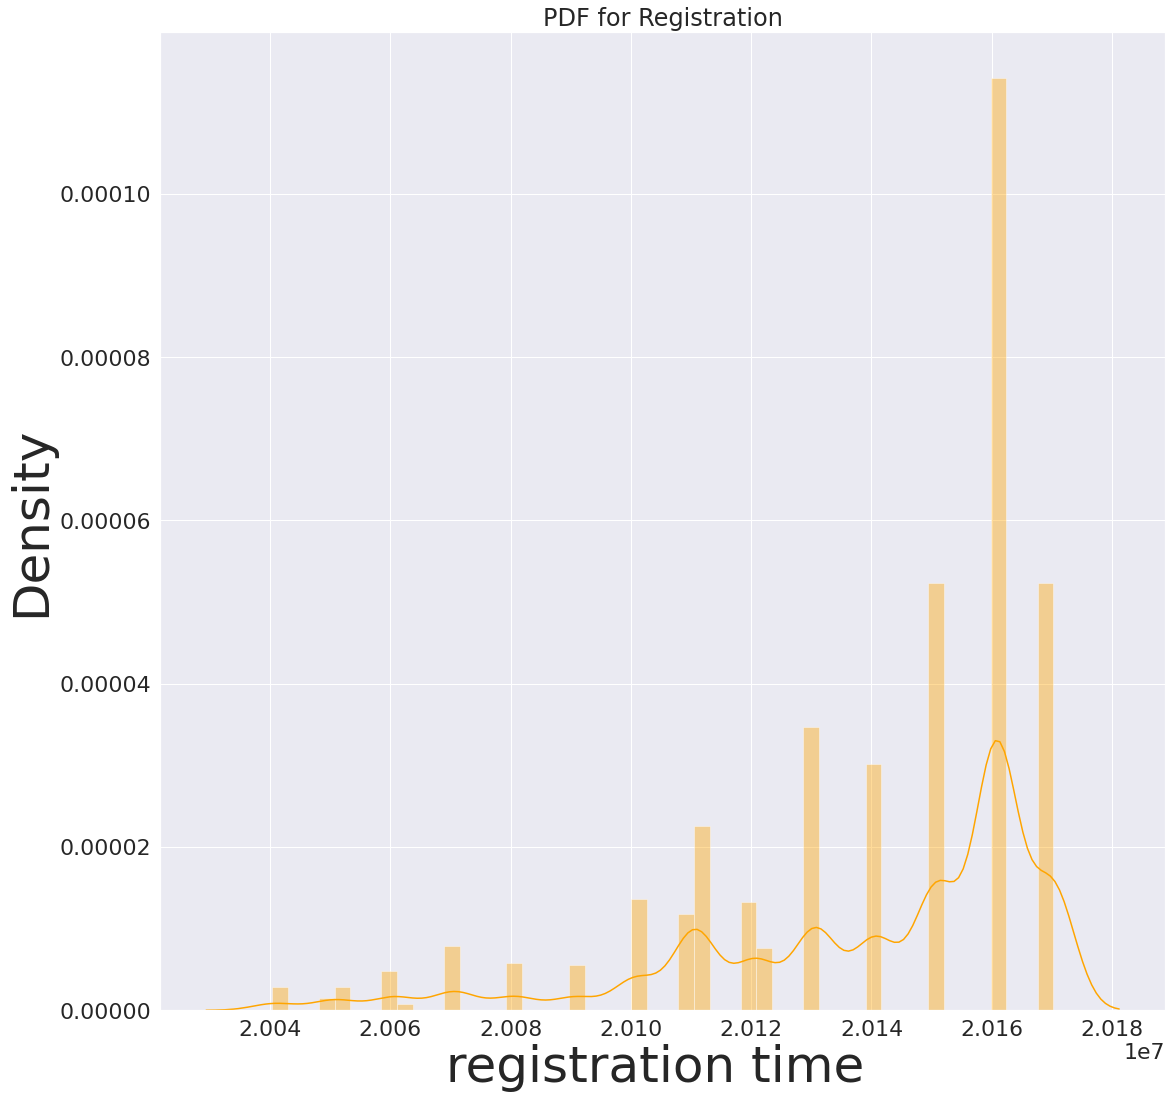

In [152]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

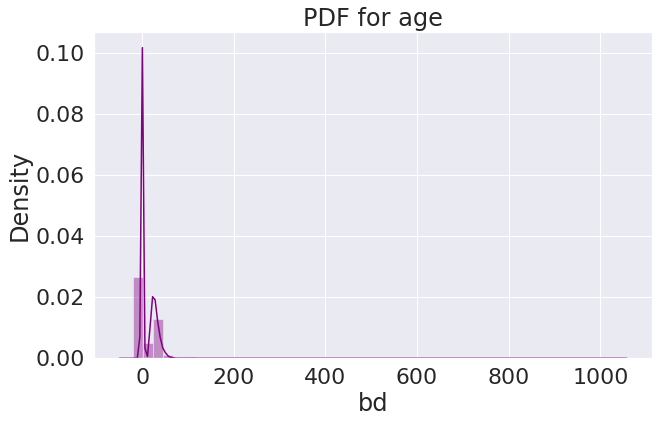

In [153]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)
plot_pdf_cdf(members['bd'], False)

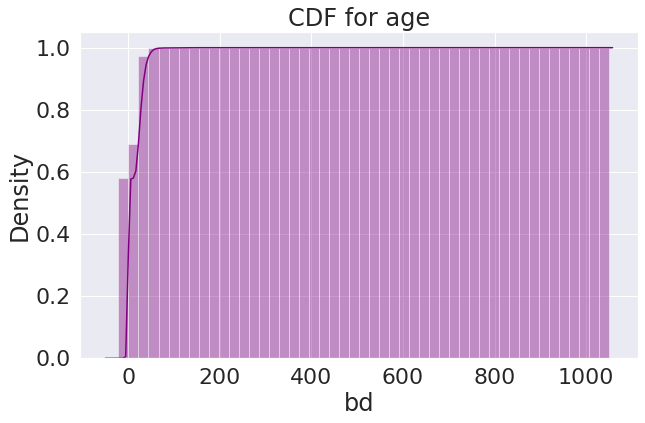

In [154]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [155]:
np.percentile(members['bd'].values, 98)

47.0

In [156]:
#DATA PREPROCESSING AND CLEANING
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')
train = train.fillna(-1)
test = test.fillna(-1)

In [157]:
import gc
del members, songs; gc.collect();
colm = list(train.columns)
colm.remove('target')
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 206.99it/s]


In [158]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [160]:
#TRYING OUT BASIC CLASSIFICATION MODELS
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [162]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 79.0


In [163]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.994299	valid_1's auc: 0.830352
Early stopping, best iteration is:
[6]	training's auc: 0.979507	valid_1's auc: 0.841545


In [164]:
p_test = model1.predict(X_test)

In [165]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.033333%
